@Author: Rahul<br>
@Date: 18-11-2024<br>
@Last modified by: Rahul<br>
@Last modified Date:18-11-2024<br>
@Title: predicting whether customer will subscribe to term deposit or not using single layer neural network

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Reading the Data

In [12]:
dataset = pd.read_csv('bank.csv',delimiter=';')

print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

Finding the outlier

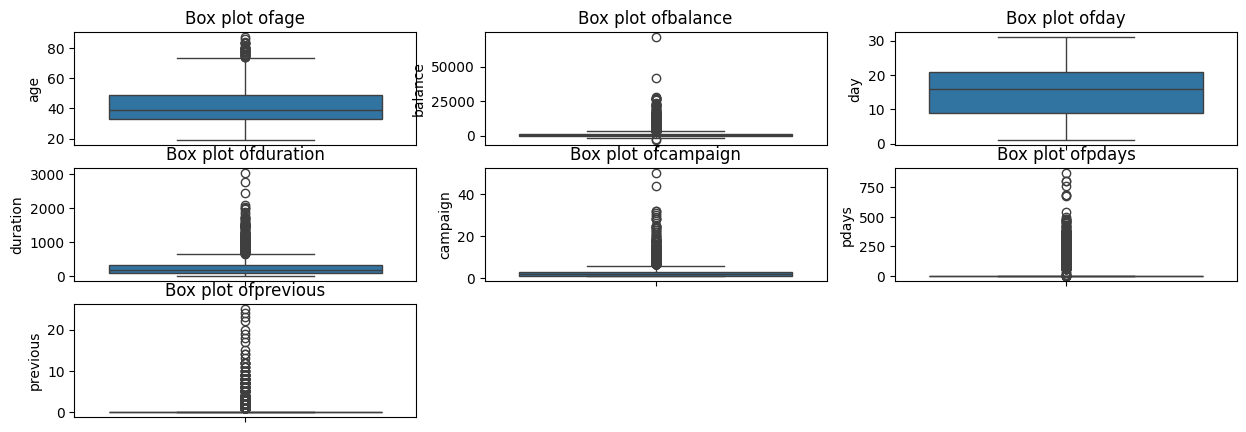

In [13]:
numerical_columns = dataset.select_dtypes(include=np.number)

plt.figure(figsize=(15,5))

for i,column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(numerical_columns[column])
    plt.title(f'Box plot of{column}')

plt.show()


Handling the outliers

(2799, 17)
               age      balance          day     duration     campaign  \
count  2799.000000  2799.000000  2799.000000  2799.000000  2799.000000   
mean     40.497678   633.188639    15.801000   209.708467     2.198642   
std       9.868212   876.283335     8.336777   146.281984     1.351878   
min      19.000000 -1746.000000     1.000000     4.000000     1.000000   
25%      33.000000    35.500000     8.000000   101.000000     1.000000   
50%      39.000000   317.000000    16.000000   171.000000     2.000000   
75%      48.000000   959.500000    22.000000   280.500000     3.000000   
max      73.000000  3561.000000    31.000000   665.000000     6.000000   

        pdays  previous  
count  2799.0    2799.0  
mean     -1.0       0.0  
std       0.0       0.0  
min      -1.0       0.0  
25%      -1.0       0.0  
50%      -1.0       0.0  
75%      -1.0       0.0  
max      -1.0       0.0  


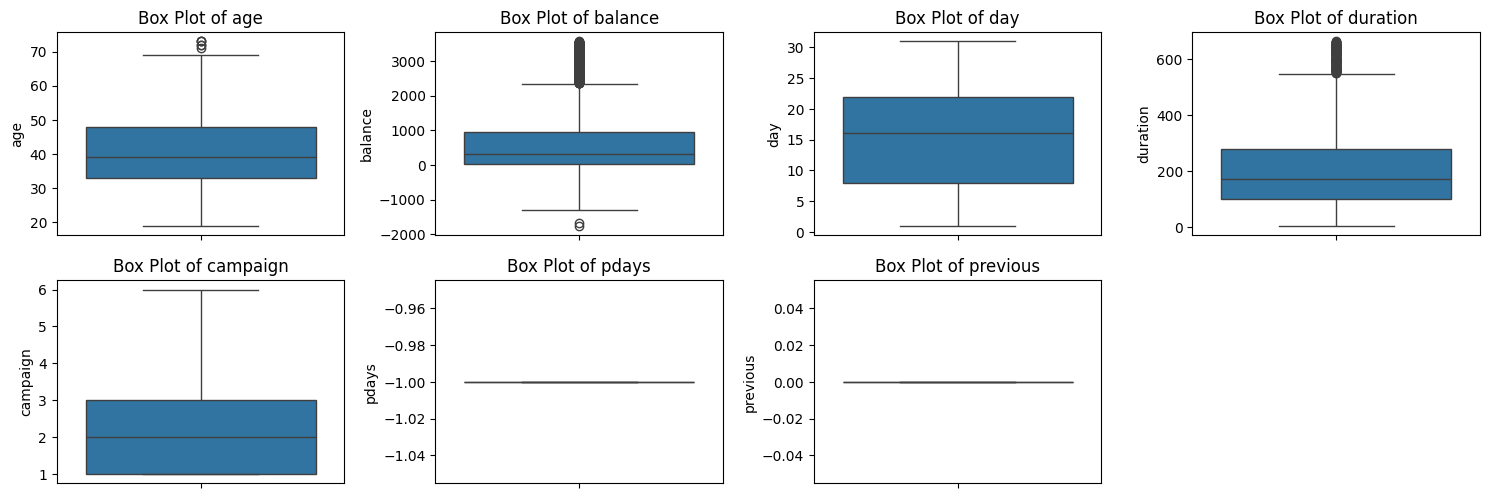

In [14]:
# Capping the outliers in each numerical column
for column in numerical_columns:
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap the outliers directly in the dataset copy
    dataset= dataset[(dataset[column]>=lower_bound) & (dataset[column]<=upper_bound)]
print(dataset.shape)

# Checking the summary after handling outliers
print(dataset.describe())

# Plotting box plots for each column to check if outliers are capped
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=dataset[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Label Encoding

In [15]:
encode = LabelEncoder()

categorical_data = dataset.select_dtypes(include=('object')).columns

for column in categorical_data:
    dataset[column] = encode.fit_transform(dataset[column])

Spliting the data

In [16]:
feature = dataset.drop(columns=['y'])
target = dataset['y']

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [17]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

Model Selection and Fitting

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=x_train.shape[1], activation='sigmoid'))  

c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the Model

In [21]:
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5263 - loss: 0.8390 - val_accuracy: 0.5607 - val_loss: 0.7903
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5948 - loss: 0.7199 - val_accuracy: 0.6643 - val_loss: 0.6607
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6939 - loss: 0.6069 - val_accuracy: 0.7696 - val_loss: 0.5562
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8232 - loss: 0.5013 - val_accuracy: 0.8536 - val_loss: 0.4758
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.4338 - val_accuracy: 0.9071 - val_loss: 0.4135
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9308 - loss: 0.3816 - val_accuracy: 0.9179 - val_loss: 0.3660
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9333 - loss: 0.3416 - val_accuracy: 0.9268 - val_loss: 0.3297
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9314 - loss: 0.3249 - val_accuracy: 0.

Evaluate the model on the test set

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate additional metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.1961
Test Accuracy: 0.94
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
[[526   4]
 [ 29   1]]
Accuracy Score: 0.94


Visualize the training process

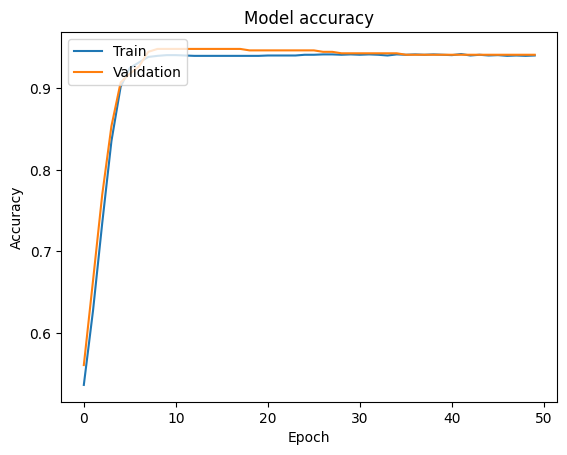

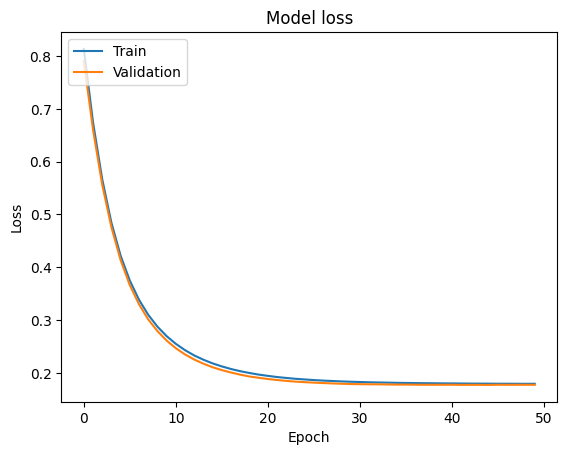

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()